# Titanic dataset a analysis

## Beginning data analysis titanic & model with Logistic Regression

## Attention


Hello, Here you find some data analysis of the titanic dataset using seaborn and pandas to give a better look in the passegers informations. 

- If you like this notebook pelase  arrow up and any question use the comments I will be glade to improve it.
- This notebook is a beginning level you just need to read trow the code to easly understand it.
- We see some graphics, make some math to see whats going on, clean the data to use logistic regression model.
- Hope you enjoy reading as I enjoyed writring. 

### It was made to you learn how to clean the data and fit your model with the train dataset. After it you can do by yourself using the train and test datasets. So give it a try of do by your own and let me know if you get it.

### Introduction
On this notebook we will use seaborn to look around the data and get some future helpful insights to get a better score on the titanic predictions. Than we will use a Logistic Regression model from skleran to se how good our model peform. 

When you don't undestand the code you can look around for some coments about them

In [1]:
#some basics imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#reading the training dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
# looking on the 5 first rows to see what the dataset is about, look the colomns names and what they should have
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some columns are hard to guess SibSp  and Parch guive us information if we are traveling with the family. Embarked is where um get in on the titanic. This information will be useful on our model.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Look into the data is necessary to get informations about what we have. First of all lets look the missing data of this titanic dataframe 

In [5]:
train.isnull()
#lets put this simple code on a headmap to see how missing we are

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Using seaborn to visualisy the missing data

<AxesSubplot:>

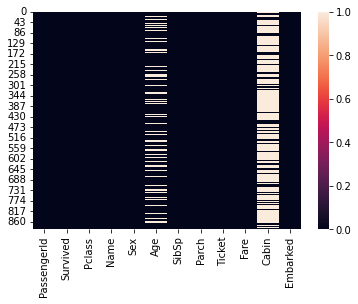

In [6]:
sns.heatmap(train.isnull())

or do it a way better

<AxesSubplot:>

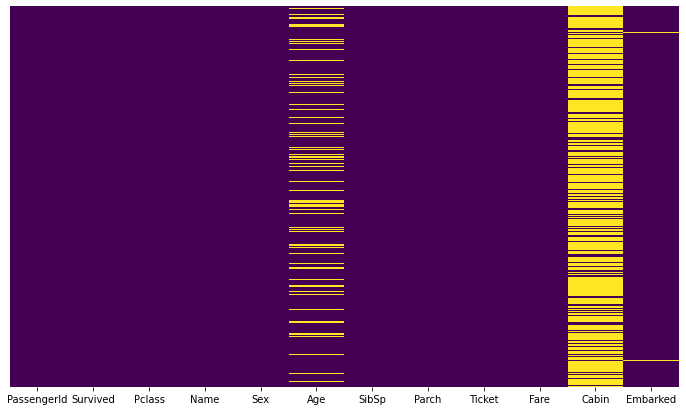

In [7]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

we see the age,cabin and Embarked column have some missing information but how much of this is information is missing

In [8]:
nullOnAge = train["Age"].isnull().sum()
nullOnAge

177

In [9]:
nullOnAge/(len(train["Age"]))

0.19865319865319866

about 20% of the Age data is missing

Now lets look around the cabin missing data

In [10]:
nullOnCabin = train["Cabin"].isnull().sum()
nullOnCabin

687

In [11]:
nullOnCabin/len(train["Cabin"])

0.7710437710437711

77% of data is missing on the Cabin collum

its possible to use the age if we complete the missing anwsers. One strategy is to use the Pclass columns who has the pasxsanger class information to use the mean of each one of them to replace the missing age. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

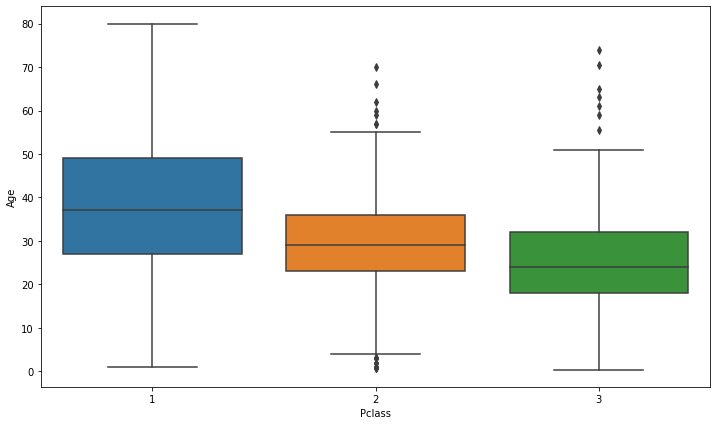

In [12]:

plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train)

# Before it, let give a look at the suvivers

from this dataset the major of people there died

<AxesSubplot:xlabel='Survived', ylabel='count'>

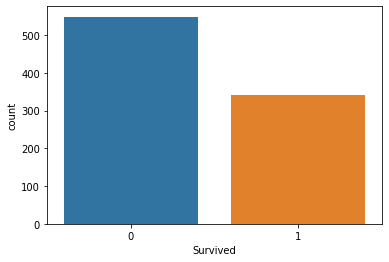

In [13]:
sns.countplot(x="Survived",data=train)

looking the plot below the major of the ones who died was the men while 2/3 of women lived. Let check out what was this exactly number it can helps in the future analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

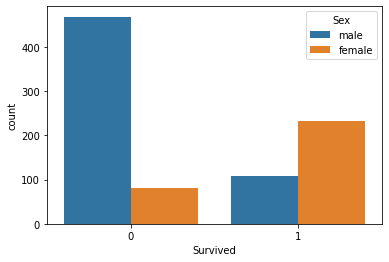

In [14]:
sns.countplot(x="Survived",data=train,hue='Sex')

In [15]:
totalman=(train["Sex"] == "male").sum()
manSurvived=((train["Survived"]== 1)&(train["Sex"] == "male")).sum()

In [16]:
per_manSurvived=manSurvived/totalman
per_manSurvived

# 18,9% of the man survived

0.18890814558058924

In [17]:
totalwoman=(train["Sex"] == "female").sum()
womanSurvived=((train["Survived"]== 1)&(train["Sex"] == "female")).sum()

In [18]:
per_womanSurvived=womanSurvived/totalwoman
per_womanSurvived

#74% of the woman on titanic survived

0.7420382165605095

<AxesSubplot:xlabel='Survived', ylabel='count'>

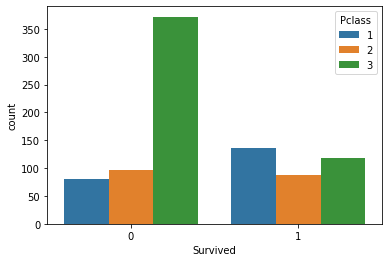

In [19]:
sns.countplot(x="Survived",data=train,hue='Pclass')

Giving a look at the age

<AxesSubplot:>

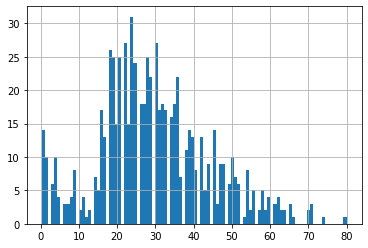

In [20]:
train['Age'].hist(bins=100)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

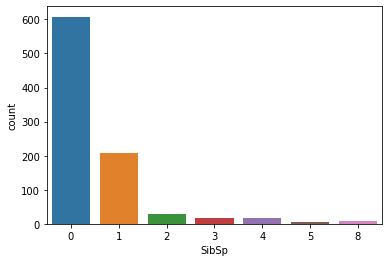

In [21]:
sns.countplot(x='SibSp',data=train)

# Data manipulation -  using pclass to input missing age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

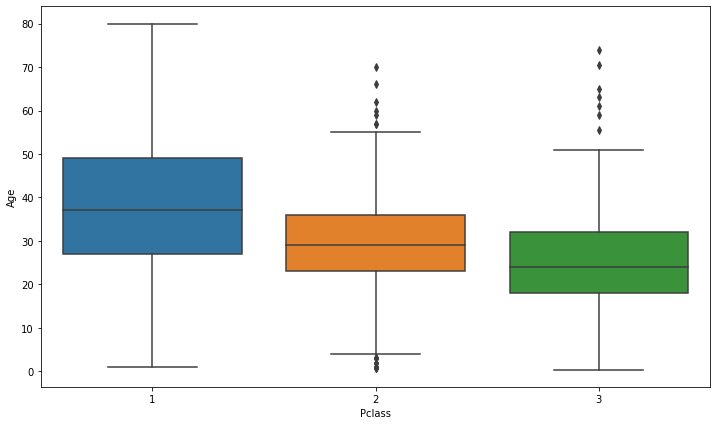

In [22]:

plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [23]:
# this function will replace the null age number for the mean of pclass if the passenger is from
#first class he will return 38 years as we can see in the up figure that is the mean of fisrt class age;

def put_age (cols):
    age = cols[0]
    Classe = cols[1]
    
    if pd.isnull(age):
        if Classe == 1:
            return 38
        elif Classe == 2:
            return 30
        else:
            return 25
    else:
        return age
        

In [24]:
#calling the function using apply, very useful
train["Age"] = train[["Age","Pclass"]].apply(put_age,axis=1) 


<AxesSubplot:>

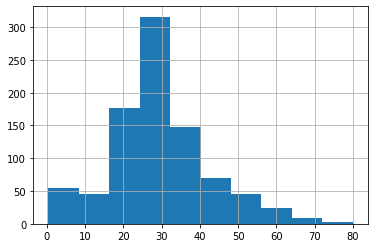

In [25]:
train["Age"].hist()

After we use the pclass age mean to input on the missing ages of the dataframe lets check how it looks and see what else can be done to clean the data 

<AxesSubplot:>

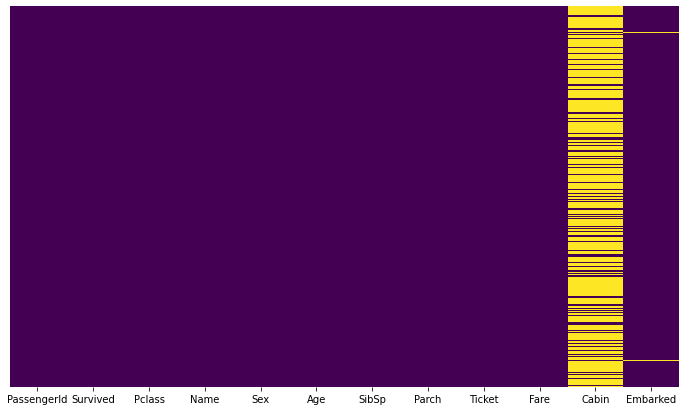

In [26]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

In [27]:
#just del the column that we cant work with
del train["Cabin"]

<AxesSubplot:>

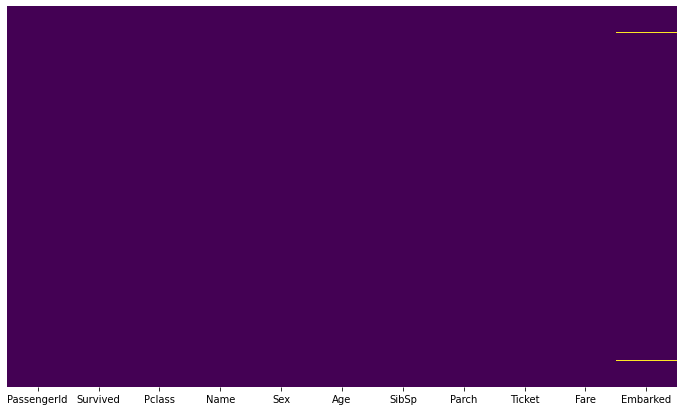

In [28]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

# get_dummies method 

get dummies is useful to discretize the categorical variables transforming them in zeros and ones we need to do it to sex and Embarked

In [29]:
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [30]:
# but we can exclude the first line the is redundant
pd.get_dummies(train["Sex"],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [31]:
Sex=pd.get_dummies(train["Sex"],drop_first=True)


In [32]:
Embark=pd.get_dummies(train["Embarked"],drop_first=True)

In other hand our model cant undestand categorical variables thats how we use the get_dummies method;
so we need to drop the colums (axis=1) that are not numerical.

In [33]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket',"Embarked"],axis=1, inplace = True)

In [34]:
#concat put the infomation together
train = pd.concat([train,Sex,Embark], axis= 1)

In [35]:
#renamin the column called male by get_dummies to its original
train.rename(columns ={"male":"Sex"},inplace=True)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


Do you remember that embarked had 2 outlayers Nan on they columns? lets drop they out as simple as :

In [36]:
train.dropna(inplace=True)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


<AxesSubplot:>

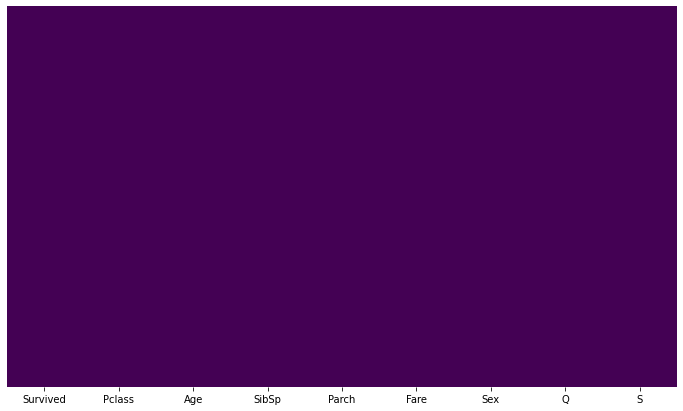

In [37]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

In resume what we did was transforme the dataset trow numbers representation, notice that now the dataset shows the Sex in a binary situation where the male is represented by the number 1 and the female by the number 0 the same logic goes to the embarked columns that had 3 representations C Q S notice that we dont need tree columns to represent them just the Q and S because when we want to represent the letter C embark we can do it by zeroly(if this word don't exist it should) Q and S. now lets train the logistic regression model and see the results.

# The model

the easy thing that we will do is to test this model. First of all we will import it from sklearn and as we are using only the train dataset we need to split it into train and test. Train is what we use in out model to learn and Test is the new information that we evaluate our model.

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.model_selection import train_test_split

use train_test_split to test the train dataset look close the code below

-train_test_split receive 4 variables
- X_train and X_test will get all the columns from data set droping survive
- y_train and y_test will get only the survived columns
- test_size = 0.3 will split 70% train and 30% test

 

In [40]:

X_train1, X_test1,y_train1,y_test1 = train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size=0.3)

here we just call the instance

In [41]:
logmodel = LogisticRegression(solver='liblinear') #solver = "liblinear" was used because of a kaggle error

In [42]:
# as simple as that you train your model
logmodel.fit(X_train1,y_train1)

LogisticRegression(solver='liblinear')

In [43]:
#how simple as that you predict your results
predict = logmodel.predict(X_test1)
len(predict)

268

In [44]:
#this import here will help us to evaluate what we get
from sklearn.metrics import classification_report

# Train results

In [45]:
#here is the anwser
print(classification_report(y_test1,predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       171
           1       0.72      0.70      0.71        97

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



# WE'RE DONE! 

congratulations if you come until here and if you understand a good part of it. Now its time to make the kaggle prediction because you saw that you model worked and I would like that you did that alone comming here just to check if you did right or to help you with the csv file for  exemple.



# Train and Test

Now its time to make the kaggle challenge by youself with the same principle that we did util now. The only change is that you will import the train and the test clean them up and fit on you logistic regression model. 


In [46]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:>

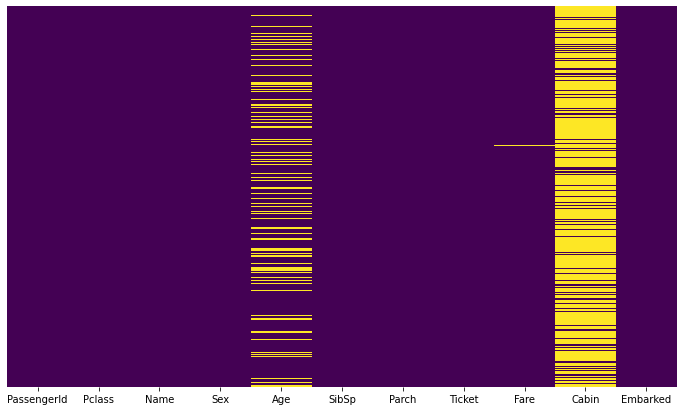

In [47]:
plt.figure(figsize=(12, 7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

lets use the code we use before to replace the Age with the mean of Pclass and exclude the null Fare line

In [48]:
test["Age"] = test[["Age","Pclass"]].apply(put_age,axis=1) 

<AxesSubplot:>

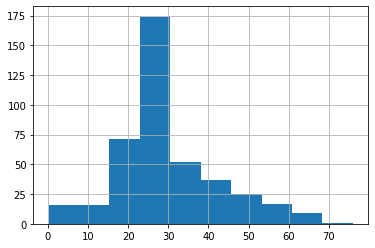

In [49]:
test["Age"].hist()

<AxesSubplot:>

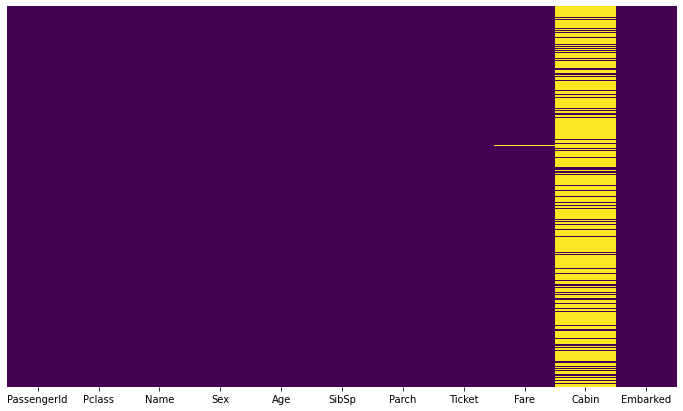

In [50]:
plt.figure(figsize=(12, 7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation


In [51]:
test.drop(["Cabin"],axis=1,inplace=True)

we notice that the columns fare has only one Nan. To use this dataframe on titanic anwser we need all those lines to send the right awnser if we just del the line the answer will be wrong and very hard to fill

# Fare mean to input missing Fare row

In [52]:
#serach the Nan line and input the mean of Fare
test[test["Fare"].isna()] = test[test["Fare"].isna()].fillna(test["Fare"].mean())

In [53]:
test["Fare"].mean()

35.6271884892086

<AxesSubplot:>

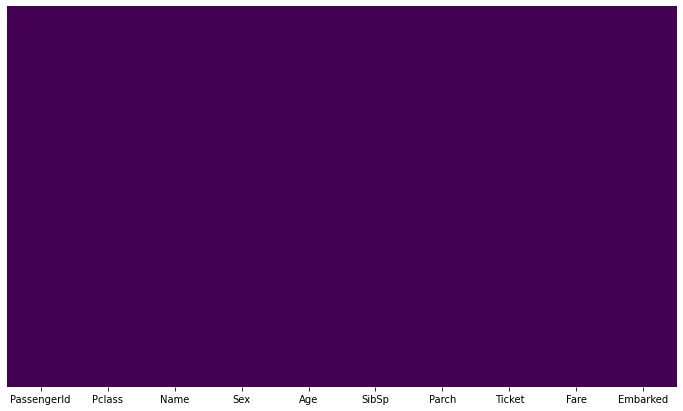

In [54]:
plt.figure(figsize=(12, 7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation


In [55]:
Sex= pd.get_dummies(test["Sex"],drop_first=1)

In [56]:
Embark= pd.get_dummies(test["Embarked"],drop_first=1)


In [57]:
test.drop(["PassengerId","Sex","Name","Ticket","Embarked"],axis=1,inplace=True)

In [58]:

test=pd.concat([test,Sex,Embark],axis=1)
test


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1


In [59]:
test.rename(columns ={"male":"Sex"},inplace=True)

In [60]:
X_train = train.drop("Survived",axis=1)
y_train = train["Survived"]

In [61]:
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [62]:
prediction = logmodel.predict(test)


In [63]:
testID = pd.read_csv('/kaggle/input/titanic/test.csv')

In [64]:
#good way to output the result exactly how kaggle wants

sub = pd.Series(prediction, index=testID["PassengerId"],name = "Survived")

In [65]:
sub.to_csv("model_LR.csv",header=True)